In [57]:
# Célula 1 – Imports e estilo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import folium
from IPython.display import display, Markdown

plt.style.use('seaborn-v0_8')
sns.set_palette("viridis")
%matplotlib inline

In [58]:
# Célula 2 – Carregar e preparar dados
eu_countries = ['Portugal','France','Italy','Spain','Germany','Austria','Greece','Hungary',
                'Romania','Bulgaria','Croatia','Slovenia','Slovakia','Czech Republic','Poland',
                'Cyprus','Malta','Belgium','Netherlands','Luxembourg','Ireland','Denmark',
                'Sweden','Finland','Estonia','Latvia','Lithuania']

df = pd.read_csv('./data/winemag-data-130k-v2.csv')
df_eu = df[df['country'].isin(eu_countries)].copy()

# Limpeza preço
df_eu['price'] = df_eu.groupby('country')['price'].transform(lambda x: x.fillna(x.median()))
df_eu['price'].fillna(df_eu['price'].median(), inplace=True)
df_eu = df_eu[df_eu['price'] > 0].copy()

# Qualidade/preço
df_eu['points_per_euro'] = df_eu['points'] / df_eu['price']

display(Markdown(f"**Vinhos da UE analisados: {len(df_eu):,}**"))
df_eu.head()

**Vinhos da UE analisados: 60,542**

,id,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,points_per_euro
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,28.0,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,3.107143
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,5.800000
5,5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem,5.800000
6,6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,NaN,Kerin O’Keefe,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo,5.437500
7,7,France,This dry and restrained wine offers spice in p...,NaN,87,24.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Trimbach 2012 Gewurztraminer (Alsace),Gewürztraminer,Trimbach,3.625000


In [59]:
# Célula 3 – Métricas principais
ranking = df_eu.groupby('country')['points'].mean().round(2)
top_pais = ranking.idxmax()
top_pts  = ranking.max()
melhor_qp = df_eu.groupby('country')['points_per_euro'].mean().idxmax()

display(Markdown(f"""
### Métricas Principais
- **Melhor qualidade média**: {top_pais} → **{top_pts} pontos**  
- **Melhor custo-benefício**: {melhor_qp}  
- **Total de vinhos UE**: {len(df_eu):,}
"""))


### Métricas Principais
- **Melhor qualidade média**: Austria → **90.1 pontos**  
- **Melhor custo-benefício**: Romania  
- **Total de vinhos UE**: 60,542


In [60]:
# Célula 4 – Mapa Choropleth (agora sem erro!)
points_by_country = ranking.reset_index()

fig = px.choropleth(points_by_country,
                    locations="country", locationmode="country names",
                    color="points", hover_name="country",
                    color_continuous_scale="Reds", range_color=(86,94),
                    title="Pontuação Média por País da UE")

fig.update_geos(lataxis_range=[35,72], lonaxis_range=[-10,40],
                center=dict(lat=54, lon=15), projection_scale=6, visible=False)

fig.update_layout(height=600)
fig  # ← só escrever fig já mostra (nunca mais usamos fig.show())

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'coloraxis': 'coloraxis',
              'geo': 'geo',
              'hovertemplate': '<b>%{hovertext}</b><br><br>country=%{location}<br>points=%{z}<extra></extra>',
              'hovertext': array(['Austria', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'France',
                                  'Germany', 'Greece', 'Hungary', 'Italy', 'Luxembourg', 'Portugal',
                                  'Romania', 'Slovakia', 'Slovenia', 'Spain'], dtype=object),
              'locationmode': 'country names',
              'locations': array(['Austria', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'France',
                                  'Germany', 'Greece', 'Hungary', 'Italy', 'Luxembourg', 'Portugal',
                                  'Romania', 'Slovakia', 'Slovenia', 'Spain'], dtype=object),
              'name': '',
              'type': 'choropleth',
              'z': {'bdata': ('ZmZmZmaGVkBcj8L1KPxVQK5H4XoUzl' ... 'AAAMBVQBSuR+F6BFZAw/UoXI/SVUA='),
                    'dtype': 'f8'}}],
    'layout': {'coloraxis': {'cmax': 94,
                             'cmin': 86,
                             'colorbar': {'title': {'text': 'points'}},
                             'colorscale': [[0.0, 'rgb(255,245,240)'], [0.125,
                                            'rgb(254,224,210)'], [0.25,
                                            'rgb(252,187,161)'], [0.375,
                                            'rgb(252,146,114)'], [0.5,
                                            'rgb(251,106,74)'], [0.625,
                                            'rgb(239,59,44)'], [0.75,
                                            'rgb(203,24,29)'], [0.875,
                                            'rgb(165,15,21)'], [1.0,
                                            'rgb(103,0,13)']]},
               'geo': {'center': {'lat': 54, 'lon': 15},
                       'domain': {'x': [0.0, 1.0], 'y': [0.0, 1.0]},
                       'lataxis': {'range': [35, 72]},
                       'lonaxis': {'range': [-10, 40]},
                       'projection': {'scale': 6},
                       'visible': False},
               'height': 600,
               'legend': {'tracegroupgap': 0},
               'template': '...',
               'title': {'text': 'Pontuação Média por País da UE'}}
})

In [61]:
# Célula 4 – Mapa Choropleth (agora sem erro!)
points_by_country = ranking.reset_index()

fig = px.choropleth(points_by_country,
                    locations="country", locationmode="country names",
                    color="points", hover_name="country",
                    color_continuous_scale="Reds", range_color=(86,94),
                    title="Pontuação Média por País da UE")

fig.update_geos(lataxis_range=[35,72], lonaxis_range=[-10,40],
                center=dict(lat=54, lon=15), projection_scale=6, visible=False)

fig.update_layout(height=600)
fig  # ← só escrever fig já mostra (nunca mais usamos fig.show())

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'coloraxis': 'coloraxis',
              'geo': 'geo',
              'hovertemplate': '<b>%{hovertext}</b><br><br>country=%{location}<br>points=%{z}<extra></extra>',
              'hovertext': array(['Austria', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'France',
                                  'Germany', 'Greece', 'Hungary', 'Italy', 'Luxembourg', 'Portugal',
                                  'Romania', 'Slovakia', 'Slovenia', 'Spain'], dtype=object),
              'locationmode': 'country names',
              'locations': array(['Austria', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'France',
                                  'Germany', 'Greece', 'Hungary', 'Italy', 'Luxembourg', 'Portugal',
                                  'Romania', 'Slovakia', 'Slovenia', 'Spain'], dtype=object),
              'name': '',
              'type': 'choropleth',
              'z': {'bdata': ('ZmZmZmaGVkBcj8L1KPxVQK5H4XoUzl' ... 'AAAMBVQBSuR+F6BFZAw/UoXI/SVUA='),
                    'dtype': 'f8'}}],
    'layout': {'coloraxis': {'cmax': 94,
                             'cmin': 86,
                             'colorbar': {'title': {'text': 'points'}},
                             'colorscale': [[0.0, 'rgb(255,245,240)'], [0.125,
                                            'rgb(254,224,210)'], [0.25,
                                            'rgb(252,187,161)'], [0.375,
                                            'rgb(252,146,114)'], [0.5,
                                            'rgb(251,106,74)'], [0.625,
                                            'rgb(239,59,44)'], [0.75,
                                            'rgb(203,24,29)'], [0.875,
                                            'rgb(165,15,21)'], [1.0,
                                            'rgb(103,0,13)']]},
               'geo': {'center': {'lat': 54, 'lon': 15},
                       'domain': {'x': [0.0, 1.0], 'y': [0.0, 1.0]},
                       'lataxis': {'range': [35, 72]},
                       'lonaxis': {'range': [-10, 40]},
                       'projection': {'scale': 6},
                       'visible': False},
               'height': 600,
               'legend': {'tracegroupgap': 0},
               'template': '...',
               'title': {'text': 'Pontuação Média por País da UE'}}
})

In [62]:
top10 = df_eu.nlargest(10, 'points')[['title','country','winery','variety','points','price','province']]
top10.index = range(1,11)
top10.style.format({"price": "€{:.0f}", "points": "{:.0f} pts"})

,title,country,winery,variety,points,price,province
1,Avignonesi 1995 Occhio di Pernice (Vin Santo di Montepulciano),Italy,Avignonesi,Prugnolo Gentile,100 pts,€210,Tuscany
2,Krug 2002 Brut (Champagne),France,Krug,Champagne Blend,100 pts,€259,Champagne
3,Tenuta dell'Ornellaia 2007 Masseto Merlot (Toscana),Italy,Tenuta dell'Ornellaia,Merlot,100 pts,€460,Tuscany
4,Casa Ferreirinha 2008 Barca-Velha Red (Douro),Portugal,Casa Ferreirinha,Portuguese Red,100 pts,€450,Douro
5,Biondi Santi 2010 Riserva (Brunello di Montalcino),Italy,Biondi Santi,Sangiovese,100 pts,€550,Tuscany
6,Château Léoville Barton 2010 Saint-Julien,France,Château Léoville Barton,Bordeaux-style Red Blend,100 pts,€150,Bordeaux
7,Louis Roederer 2008 Cristal Vintage Brut (Champagne),France,Louis Roederer,Champagne Blend,100 pts,€250,Champagne
8,Salon 2006 Le Mesnil Blanc de Blancs Brut Chardonnay (Champagne),France,Salon,Chardonnay,100 pts,€617,Champagne
9,Château Lafite Rothschild 2010 Pauillac,France,Château Lafite Rothschild,Bordeaux-style Red Blend,100 pts,€1500,Bordeaux
10,Casanova di Neri 2007 Cerretalto (Brunello di Montalcino),Italy,Casanova di Neri,Sangiovese Grosso,100 pts,€270,Tuscany


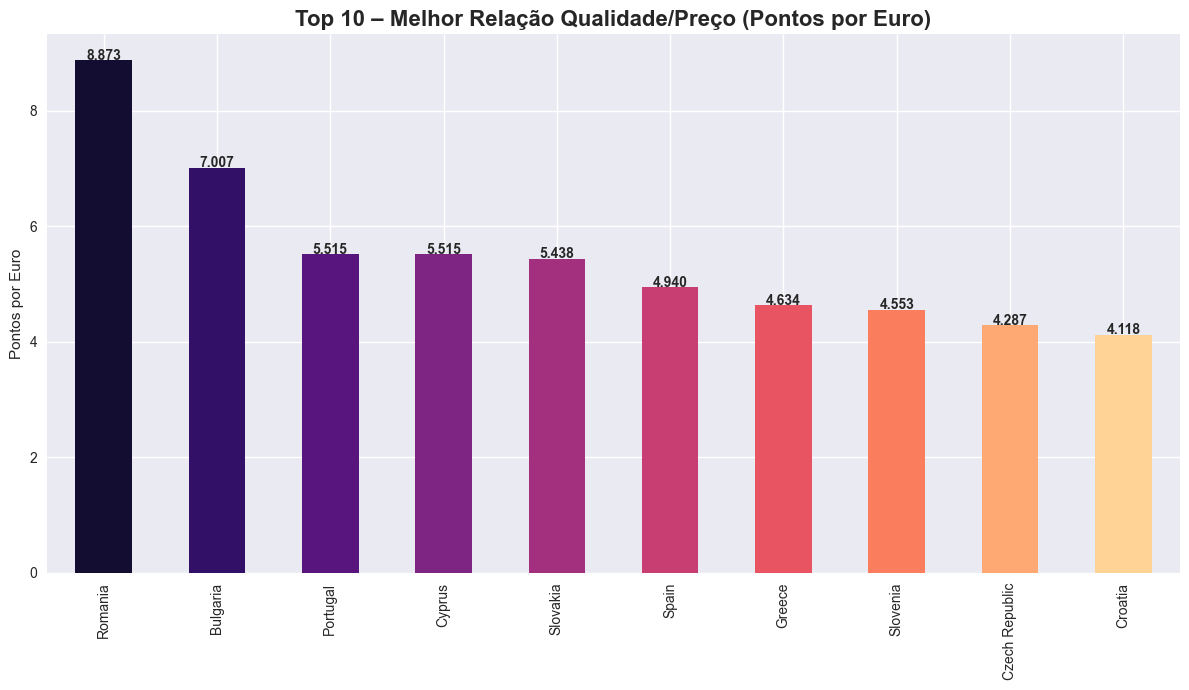

In [63]:
quality_price = df_eu.groupby('country')['points_per_euro'].mean().sort_values(ascending=False)

plt.figure(figsize=(12,7))
ax = quality_price.head(10).plot(kind='bar', color=sns.color_palette("magma", 10))
plt.title("Top 10 – Melhor Relação Qualidade/Preço (Pontos por Euro)", fontsize=16, fontweight='bold')
plt.ylabel("Pontos por Euro")
plt.xlabel("")
for i, v in enumerate(quality_price.head(10)):
    ax.text(i, v + 0.01, f"{v:.3f}", ha='center', fontweight='bold')
plt.tight_layout()
plt.show()

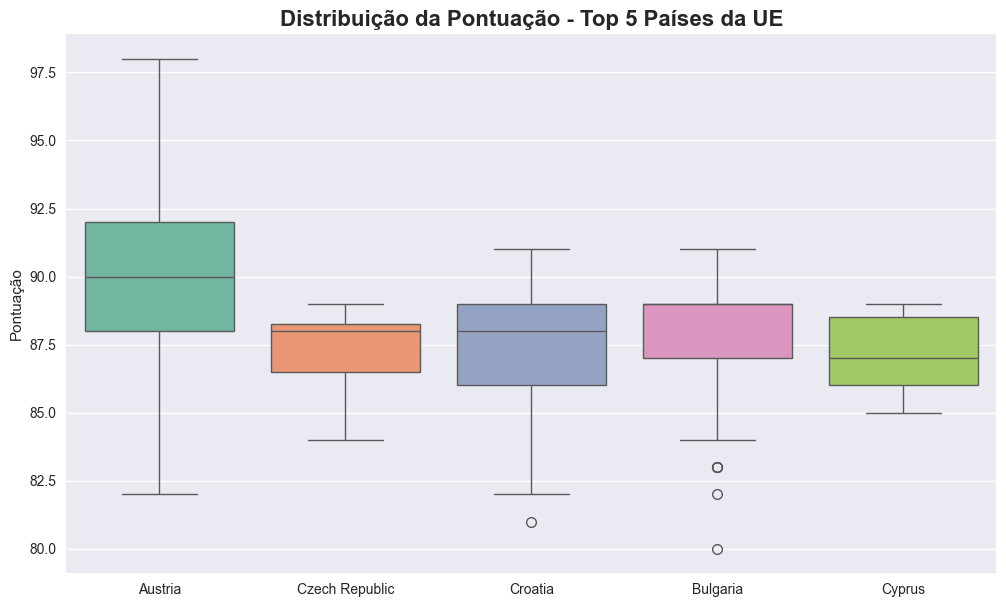

In [64]:
top5_countries = ranking.head(5).index.tolist()

plt.figure(figsize=(12,7))
sns.boxplot(data=df_eu[df_eu['country'].isin(top5_countries)], x='country', y='points', palette="Set2")
plt.title('Distribuição da Pontuação - Top 5 Países da UE', fontsize=16, fontweight='bold')
plt.ylabel('Pontuação')
plt.xlabel('')
plt.show()

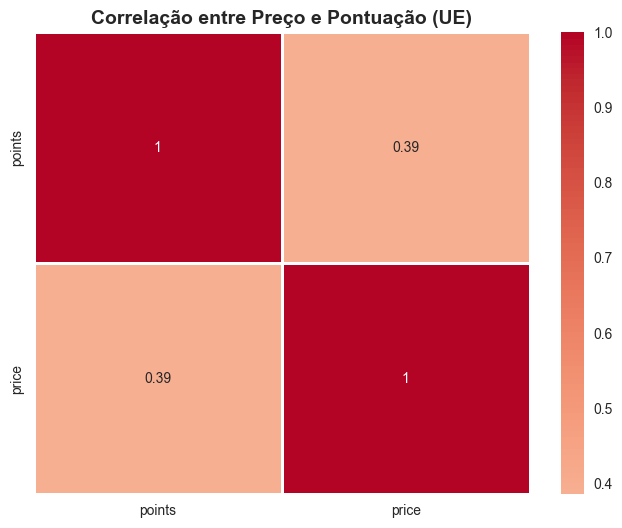

In [65]:
plt.figure(figsize=(8,6))
sns.heatmap(df_eu[['points', 'price']].corr(), annot=True, cmap='coolwarm', center=0, linewidths=2)
plt.title('Correlação entre Preço e Pontuação (UE)', fontsize=14, fontweight='bold')
plt.show()

In [66]:
coordinates = {
    'Portugal': [39.5, -8.2], 'Spain': [40.4, -3.7], 'France': [46.2, 2.2],
    'Italy': [42.5, 12.1], 'Germany': [51.1, 10.4], 'Austria': [47.5, 13.2],
    'Hungary': [47.1, 19.5], 'Romania': [45.9, 24.9], 'Greece': [39.0, 21.8],
    'Bulgaria': [42.7, 25.4], 'Croatia': [45.1, 15.2], 'Slovenia': [46.1,14.8],
    'Belgium':[50.5,4.0], 'Netherlands':[52.1,5.3], 'Poland':[52.1,19.2]
}

europe_map = folium.Map(location=[54, 15], zoom_start=4, tiles='CartoDB positron')

for country, coord in coordinates.items():
    if country in ranking.index:
        pts = float(ranking[country])
        folium.CircleMarker(
            location=coord,
            radius=max(5, pts/2.5),
            popup=f"<b>{country}</b><br>Pontuação média: {pts}",
            color='crimson',
            fill=True,
            fill_color='crimson',
            fill_opacity=0.7
        ).add_to(europe_map)

# Mostra o mapa no notebook
display(europe_map)

In [67]:
# Célula: Guardar os objetos já calculados para o Streamlit usar
import pickle
import os

# Objetos que queres partilhar com o app.py
dados_para_app = {
    'df_eu': df_eu,
    'ranking': ranking,
    'top_pais': top_pais,
    'top_pts': top_pts,
    'melhor_qp': melhor_qp,
    'fig_mapa': fig,                    # o teu choropleth já pronto
    'coordinates': coordinates,          # se usares o folium depois
}

# Guarda num ficheiro temporário na pasta
with open('dados_notebook.pkl', 'wb') as f:
    pickle.dump(dados_para_app, f)

print("Dados guardados com sucesso! Agora podes correr o Streamlit →")

Dados guardados com sucesso! Agora podes correr o Streamlit →


In [68]:
!streamlit run app.py

^C
